<a href="https://colab.research.google.com/github/sashasautkin/-/blob/master/neural_network_plan_village.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 7.7 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 106 kB 79.3 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 2.3 MB 47.8 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 213 kB 61.3 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 278 kB 66.6 MB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 
     |████████████████████████████████| 80 kB 10.2 MB/s 
     |████████████████████████████████| 68 kB 7.6 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 68 kB 7.1 

In [2]:
import gradio as gr

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import pathlib

data_dir = '/content/drive/MyDrive/database/Plant_village'
data_dir = pathlib.Path(data_dir)

/content/drive/MyDrive/database/Plant_village/Apple___Apple_scab/image (342).JPG


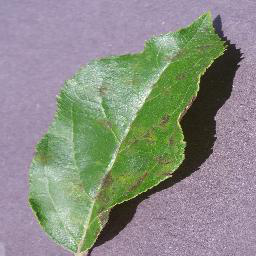

In [5]:
apple = list(data_dir.glob('Apple___Apple_scab/*'))
print(apple[0])
PIL.Image.open(str(apple[0]))

In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18232 files belonging to 16 classes.
Using 14586 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18232 files belonging to 16 classes.
Using 3646 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Raspberry___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Late_blight', 'Tomato___healthy']


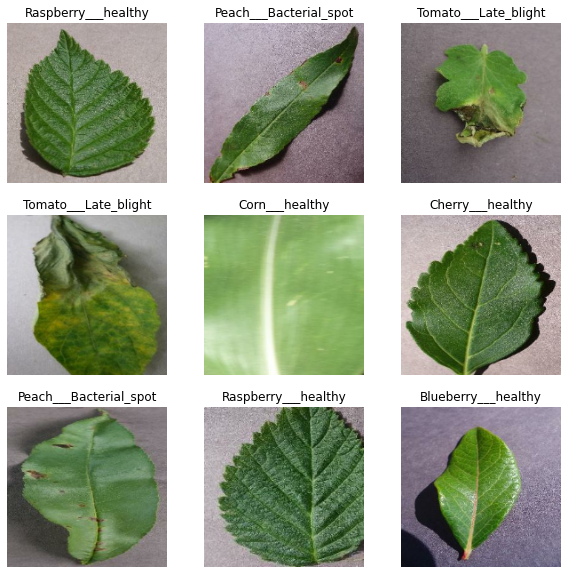

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
num_classes = 16

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=7
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/7


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


456/456 [==============================] - 502s 1s/step - loss: 0.1002 - accuracy: 0.9672 - val_loss: 0.2106 - val_accuracy: 0.9443
Epoch 2/7
456/456 [==============================] - 486s 1s/step - loss: 0.0624 - accuracy: 0.9794 - val_loss: 0.3084 - val_accuracy: 0.9202
Epoch 3/7
456/456 [==============================] - 487s 1s/step - loss: 0.0460 - accuracy: 0.9836 - val_loss: 0.2395 - val_accuracy: 0.9408
Epoch 4/7
456/456 [==============================] - 481s 1s/step - loss: 0.0397 - accuracy: 0.9862 - val_loss: 0.2883 - val_accuracy: 0.9344
Epoch 5/7
456/456 [==============================] - 478s 1s/step - loss: 0.0393 - accuracy: 0.9866 - val_loss: 0.3182 - val_accuracy: 0.9218
Epoch 6/7
456/456 [==============================] - 476s 1s/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.3937 - val_accuracy: 0.9092
Epoch 7/7
456/456 [==============================] - 478s 1s/step - loss: 0.0243 - accuracy: 0.9929 - val_loss: 0.2262 - val_accuracy: 0.9542


In [ ]:
model.save('neural_network_plant_village2.h5')

In [10]:
from tensorflow.keras.models import load_model
model = load_model('neural_network_plant_village2.h5')

In [11]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(16)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
sample_images = [
                 ["/content/drive/MyDrive/sample_image/Grape_Esca(Black_measles).JPG"],
                 ["/content/drive/MyDrive/sample_image/apple_apple_scab1.JPG"],
                 ["/content/drive/MyDrive/sample_image/apple_apple_scab2.JPG"],
                 ["/content/drive/MyDrive/sample_image/apple_healthy1.JPG"],
                 ["/content/drive/MyDrive/sample_image/apple_healthy2.JPG"],
                 ["/content/drive/MyDrive/sample_image/blueberry_healthy1.JPG"],
                 ["/content/drive/MyDrive/sample_image/corn_healthy1.jpg"],
                 ["/content/drive/MyDrive/sample_image/corn_northern_leaf_blight1.JPG"],
                 ["/content/drive/MyDrive/sample_image/tomato_healthy1.JPG"],
                 ["/content/drive/MyDrive/sample_image/tomato_healthy2.JPG"],
                 ["/content/drive/MyDrive/sample_image/tomato_late_blight1.JPG"],
                 ["/content/drive/MyDrive/sample_image/tomato_late_blight2.JPG"]


]

gr.Interface(fn=predict_image, inputs=image, outputs=label,capture_session=True,title="Neural network Plant Village",
    description="""    Дана нейромережа була розроблена для розпізнання захворюваності різних рослин. 
    Нейромережа може розпізнавати такі хвороби: парша яблуні, борошниста роса вишні, північний опіок листя кукурудзи,
    чорний кір винограду, бактеріальна плямистість персика, фітофтороз томатів.""", examples=sample_images).launch(debug='True')

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 31ms/step
